# Beta code # 
## Extracting  ##

In [1]:
## load depedencies 
import numpy as np # math library
import cv2 # visual computational 
import matplotlib.pyplot as plt # vizualization
import os # directory management
from configobj import ConfigObj # load rules
import lossrun

## Load files, points of interest and rules ##

In [2]:
## Read raw txt info in pdf report

PATH_txt = os.path.join('.','data','txt','')
PATH_image = os.path.join('.','data','images','')

# pdf raw file no ext 
# input file name


#__________________________________________________
pdf_file = 'A-MMED 2017 Pioneer loss runs PIO-YES0'
#___________________________________________________


#  Read text file 
txt_file = PATH_txt + pdf_file + '.txt'
#image file
image_file = PATH_image + pdf_file + '.jpg'

# Read as dict format txt file
txt_dict = lossrun.read_dict(txt_file)

# load configuration file prototype
data_ponts = ConfigObj('config_file.ino')



## Get the rules in the report ##

In [3]:
points_of_interest = lossrun.search_rules(txt_dict, data_ponts)
points_of_interest

[('insurer', 'CARRIER', 944, 66),
 ('insured', 'PREPARED FOR', 235, 67),
 ('insured', 'CLAIMANT', 1143, 819),
 ('insured', 'CLAIMANT', 329, 426),
 ('valued date', 'AS OF', 267, 174),
 ('loss date', 'DATE OF LOSS', 556, 427),
 ('reported date', 'DATE', 752, 394),
 ('status', 'STATUS', 879, 426),
 ('expense paid', 'EXPENSE', 1345, 398),
 ('indemnity paid', 'INDEMNITY', 1489, 398),
 ('broker', 'BROKER', 1241, 470)]

## Visualizate the data ##  

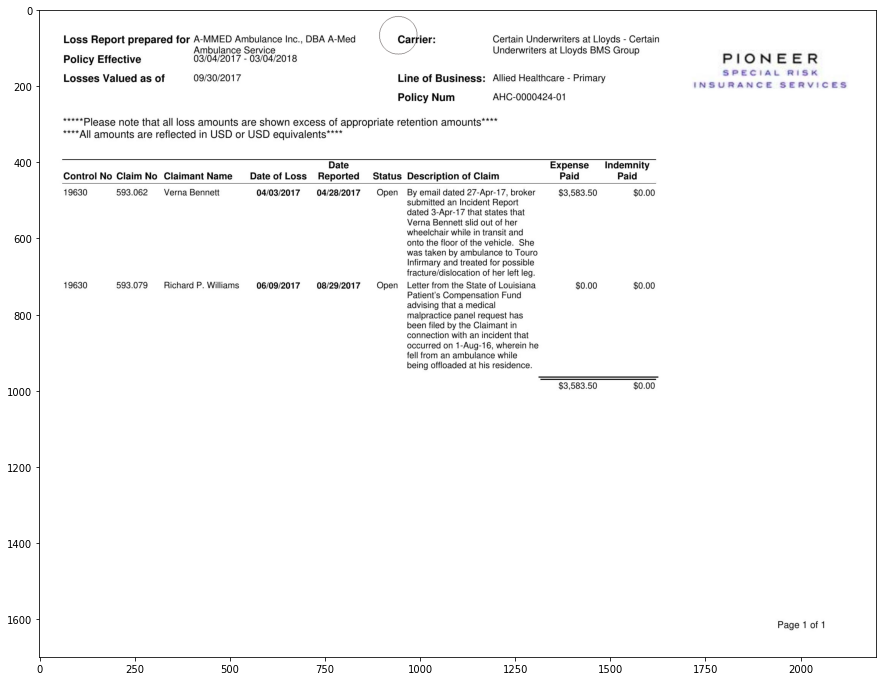

In [4]:
## read image
_image = cv2.imread(image_file)

# vis data point choords
cv2.circle(_image, (points_of_interest[0][2], points_of_interest[0][3]),50, 10)
plt.figure(figsize = (15,13))
plt.imshow(_image)

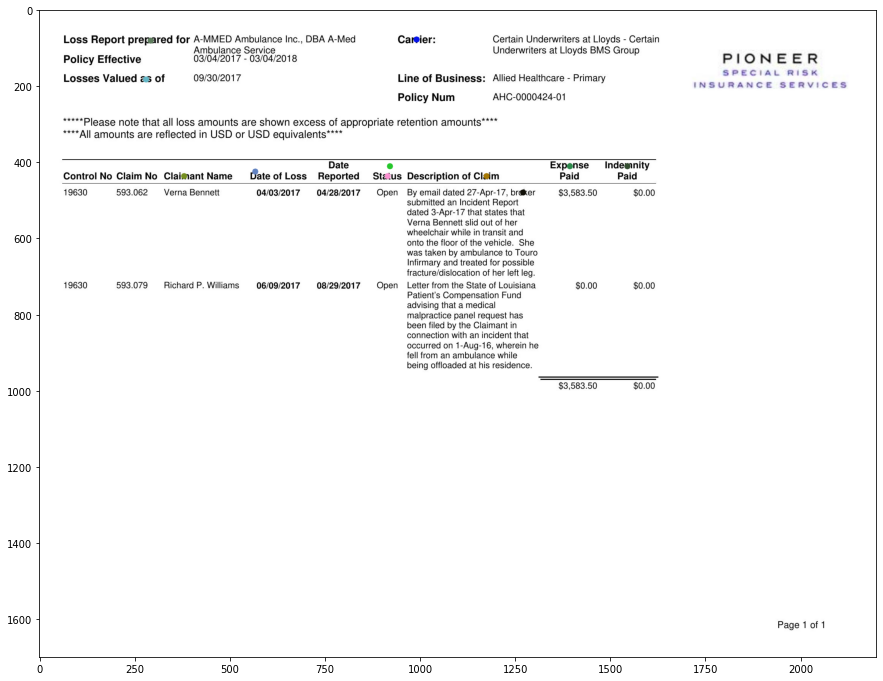

In [5]:
import random

# load report image
_image = cv2.imread(image_file)

# crea la lista vacia 
all_candidates = []

# check all spatial relation for the targets filtered
for i in range(len(points_of_interest)):
    
    # get the box dimentions
    (l, t, w, h) = (txt_dict['left'][txt_dict['left'].index(points_of_interest[i][2])],
                txt_dict['top'][txt_dict['left'].index(points_of_interest[i][2])],
                txt_dict['width'][txt_dict['left'].index(points_of_interest[i][2])],
                txt_dict['height'][txt_dict['left'].index(points_of_interest[i][2])]
                )


    # define random colors for each target
    r = random.randint(0,255)
    g = random.randint(0,255)
    b = random.randint(0,255)
    
    #Create a circle for each target
    cv2.circle(_image, ( l+ np.uint8(w/2), t + np.uint8(h/2)),8,(r,g,b),-1)

    # search in vertical and horizontal way 
    vertical_candidates = []
    horizontal_candidates = []

    #search the data
    for i in range(len(txt_dict['text'])):
        
        # if text is in same column
        if (txt_dict['left'][i] > l - w and txt_dict['left'][i] < l + w):
            vertical_candidates.append(txt_dict['text'][i])

        # if text is in same row
        if (txt_dict['top'][i] > t - h and txt_dict['top'][i] < t + h):
            horizontal_candidates.append(txt_dict['text'][i])

    # join all candidates            
    all_candidates +=  [vertical_candidates + horizontal_candidates]

plt.figure(figsize=(15,13))
plt.imshow(_image)       

In [6]:
## Filter the candidates according the gramatical rules

# Recorre los puntos de interes 
for i in points_of_interest[:]:
    print(i)
    

('insurer', 'CARRIER', 944, 66)
('insured', 'PREPARED FOR', 235, 67)
('insured', 'CLAIMANT', 1143, 819)
('insured', 'CLAIMANT', 329, 426)
('valued date', 'AS OF', 267, 174)
('loss date', 'DATE OF LOSS', 556, 427)
('reported date', 'DATE', 752, 394)
('status', 'STATUS', 879, 426)
('expense paid', 'EXPENSE', 1345, 398)
('indemnity paid', 'INDEMNITY', 1489, 398)
('broker', 'BROKER', 1241, 470)


In [7]:
' '.join(all_candidates[:][1])

'Report prepared Effective Valued as of note that all amounts are reflected No Claim No Claimant 593.062 Verna 593.079 Richard    Certain Underwriters at Lloyds - Certain    Loss Report prepared for A-MMED Ambulance Inc., DBA A-Med Carrier:'

In [8]:
## test cell ignore it






import nltk
from nltk.tag.stanford import StanfordNERTagger
st = StanfordNERTagger('codes/stanford-ner-4.0.0/classifiers/english.all.3class.distsim.crf.ser.gz', 'codes/stanford-ner-4.0.0/stanford-ner.jar')

text = ' '.join(all_candidates[:][7])

for sent in nltk.sent_tokenize(text):
    tokens = nltk.tokenize.word_tokenize(sent)
    tags = st.tag(tokens)
    for tag in tags:
        if tag[1]=='PERSON':
             print (tag)
print(tags)

[('Carrier', 'O'), (':', 'O'), ('Line', 'O'), ('Policy', 'O'), ('retention', 'O'), ('Status', 'O'), ('Open', 'O'), ('Open', 'O'), ('Date', 'O'), ('of', 'O'), ('Loss', 'O'), ('Reported', 'O'), ('Status', 'O'), ('Description', 'O'), ('of', 'O'), ('Claim', 'O'), ('Paid', 'O'), ('Paid', 'O'), ('Control', 'O'), ('No', 'O'), ('Claim', 'O'), ('No', 'O'), ('Claimant', 'O'), ('Name', 'O')]


In [9]:
# load rules    
import re
import configobj
rules = ConfigObj('config_rules_proto.ino')
import spacy
from spacy import displacy

nlp = spacy.load("en_core_web_sm")

# revisa a partir de los resultados de la busqueda
for i, j in enumerate(points_of_interest):
    
    print('data point is: '+ j[0] + ' searchin for: ' + str(rules[j[0]]))
    #print('in ',' '.join(all_candidates[:][i]))
    print('_'*30)
    string = ' '.join(all_candidates[:][i])
    re.findall(str(rules[j[0]]), string)
    doc = nlp(string)
    displacy.serve(doc, style="ent")

     #   print('here')
    

NameError: name 'ConfigObj' is not defined